# Prepare data

Stefano Coretta

## Setup

In [ ]:

library(tidyverse)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Attaching package: 'plotly'

The following object is masked from 'package:ggplot2':

    last_plot

The following object is masked from 'package:stats':

    filter

The following object is masked from 'package:graphics':

    layout

## Coretta 2018

The package `coretta2018itapol` can be installed from GitHub `stefanocoretta/coretta2018itapol@devel` (the `devel` branch contains the necessary data which is not yet available in `main`). The `dlc_voff` tibble has DLC spline data from the timepoint corresponding to the acoustically determined VC boundary in the CVCV target words.

In [ ]:

data("dlc_voff")


We can ggplotly to determine the `frame_id` of data to be excluded (hovering over a contour shows the `frame_id`).

In [ ]:

p <- dlc_voff |> 
  filter(spline == "DLC_Tongue") |> 
  ggplot(aes(X, Y, group = frame_id, text = frame_id)) +
  geom_path(alpha = 0.2) +
  coord_fixed() +
  facet_wrap(vars(speaker))

ggplotly(p, tooltip = "text")


The following shows the tongue contours of participant PL04.

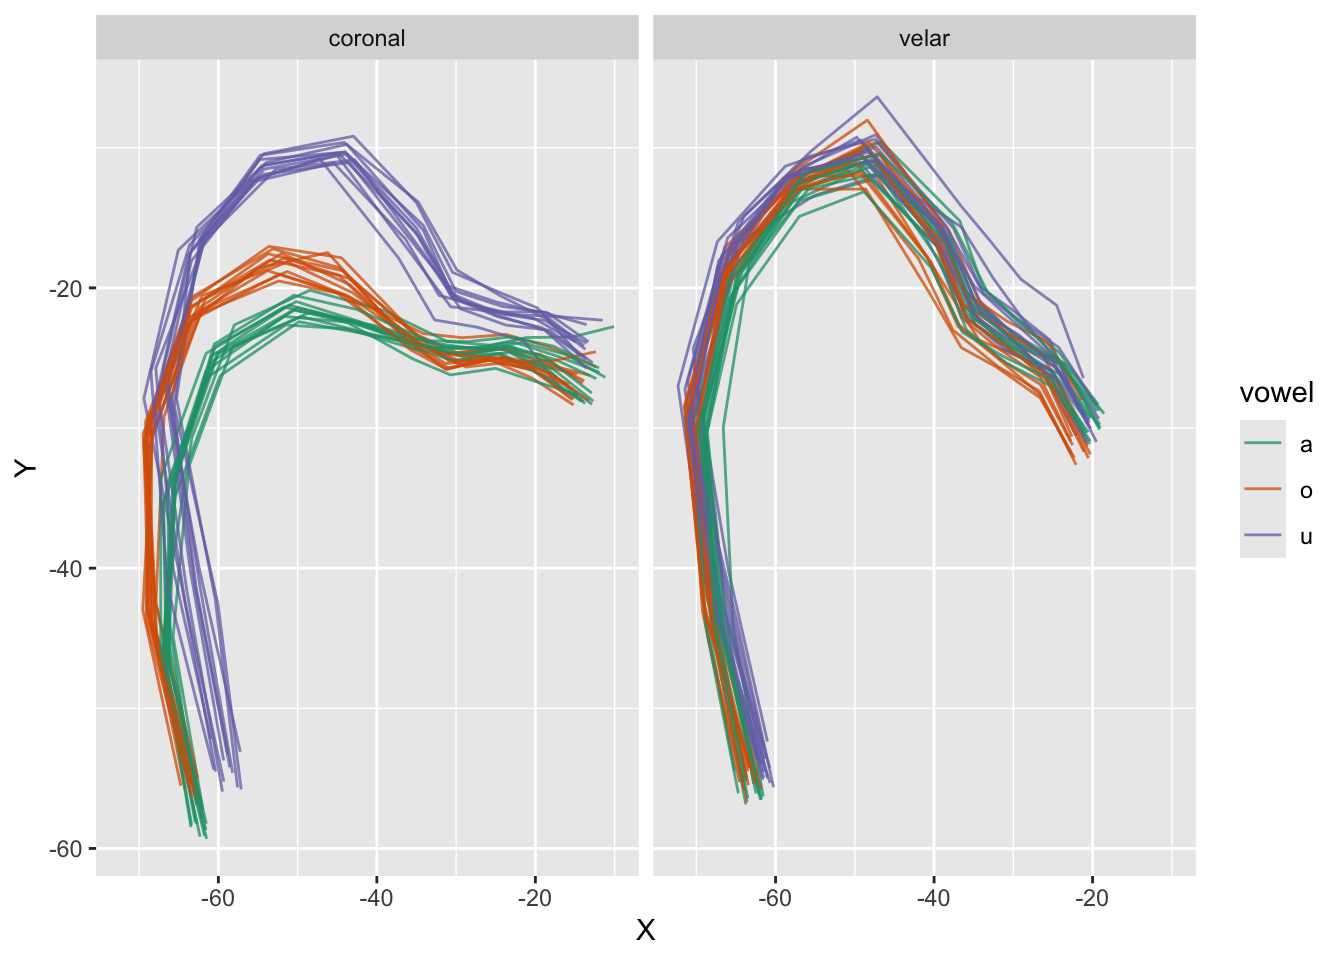

In [ ]:

dlc_voff |> 
  filter(speaker == "pl04", spline == "DLC_Tongue") |> 
  ggplot(aes(X, Y, colour = vowel, group = frame_id)) +
  geom_path(alpha = 0.75) +
  facet_grid(cols = vars(c2_place)) +
  scale_color_brewer(palette = "Dark2")


Let’s filter the data to remove wrongly tracked tongue contours. The filtered data is saved in `dlc-voff-f`. We also create two new columns as the interaction of existing columns, we calculate within-speaker z-scores for X/Y coordinates, and we convert speaker to a factor (needed for `mgcv::gam()`).

In [ ]:
dlc_voff_f <- dlc_voff |> 
  filter(
    X > -100,
    !(frame_id %in% c(110, 266, 289, 325, 398, 410, 415, 422, 801, 1134)),
    spline == "DLC_Tongue"
  ) |> 
  mutate(
    vow_place = interaction(vowel, c2_place),
    vow_place_lang = interaction(vowel, c2_place, language),
    speaker = as.factor(speaker)
  ) |> 
  group_by(speaker) |> 
  mutate(
    X_z = (X - mean(X)) / sd(X),
    Y_z = (Y - mean(Y)) / sd(Y),
  ) |> 
  ungroup()


This is the filtered data.

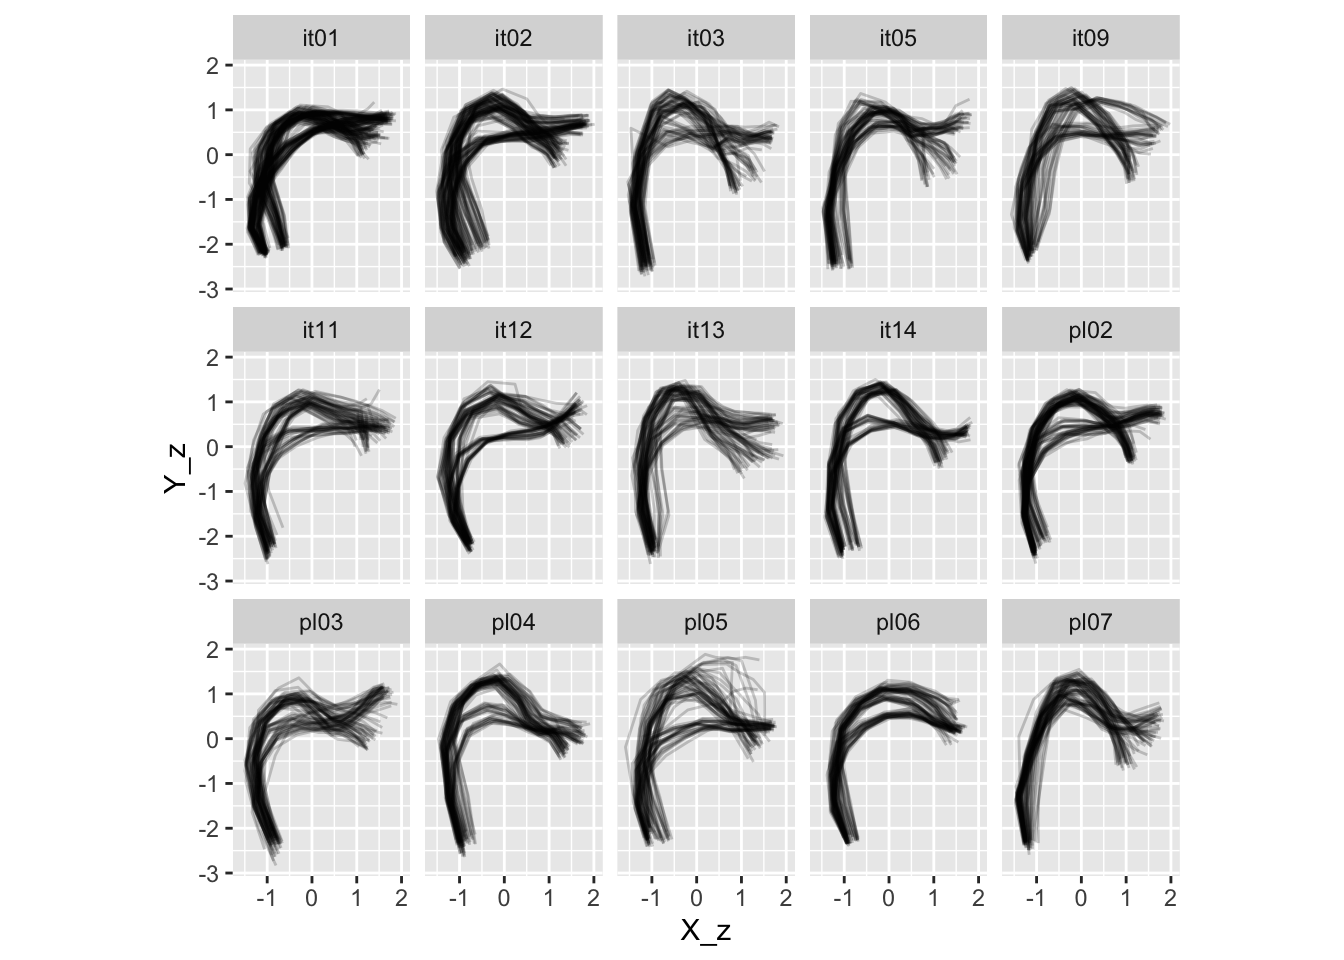

In [ ]:
dlc_voff_f |>
  filter(spline == "DLC_Tongue") |> 
  ggplot(aes(X_z, Y_z, group = frame_id)) +
  geom_path(alpha = 0.2) +
  coord_fixed() +
  facet_wrap(vars(speaker), ncol = 5)


We also plot X and Y coordinates along `knot` separately.

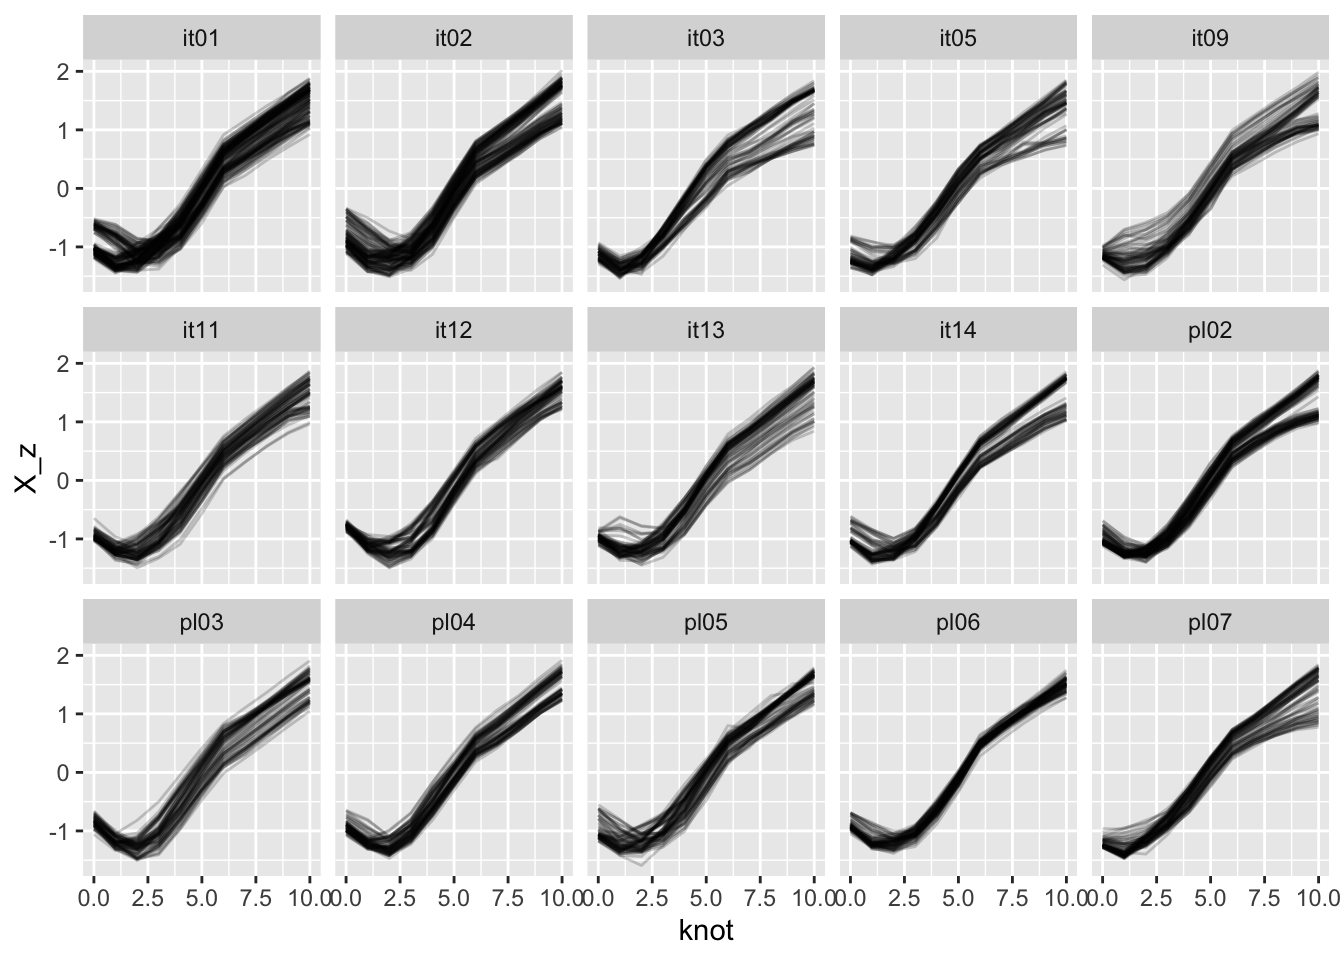

In [ ]:
dlc_voff_f |>
  filter(spline == "DLC_Tongue") |> 
  ggplot(aes(knot, X_z, group = frame_id)) +
  geom_path(alpha = 0.2) +
  facet_wrap(vars(speaker), ncol = 5)


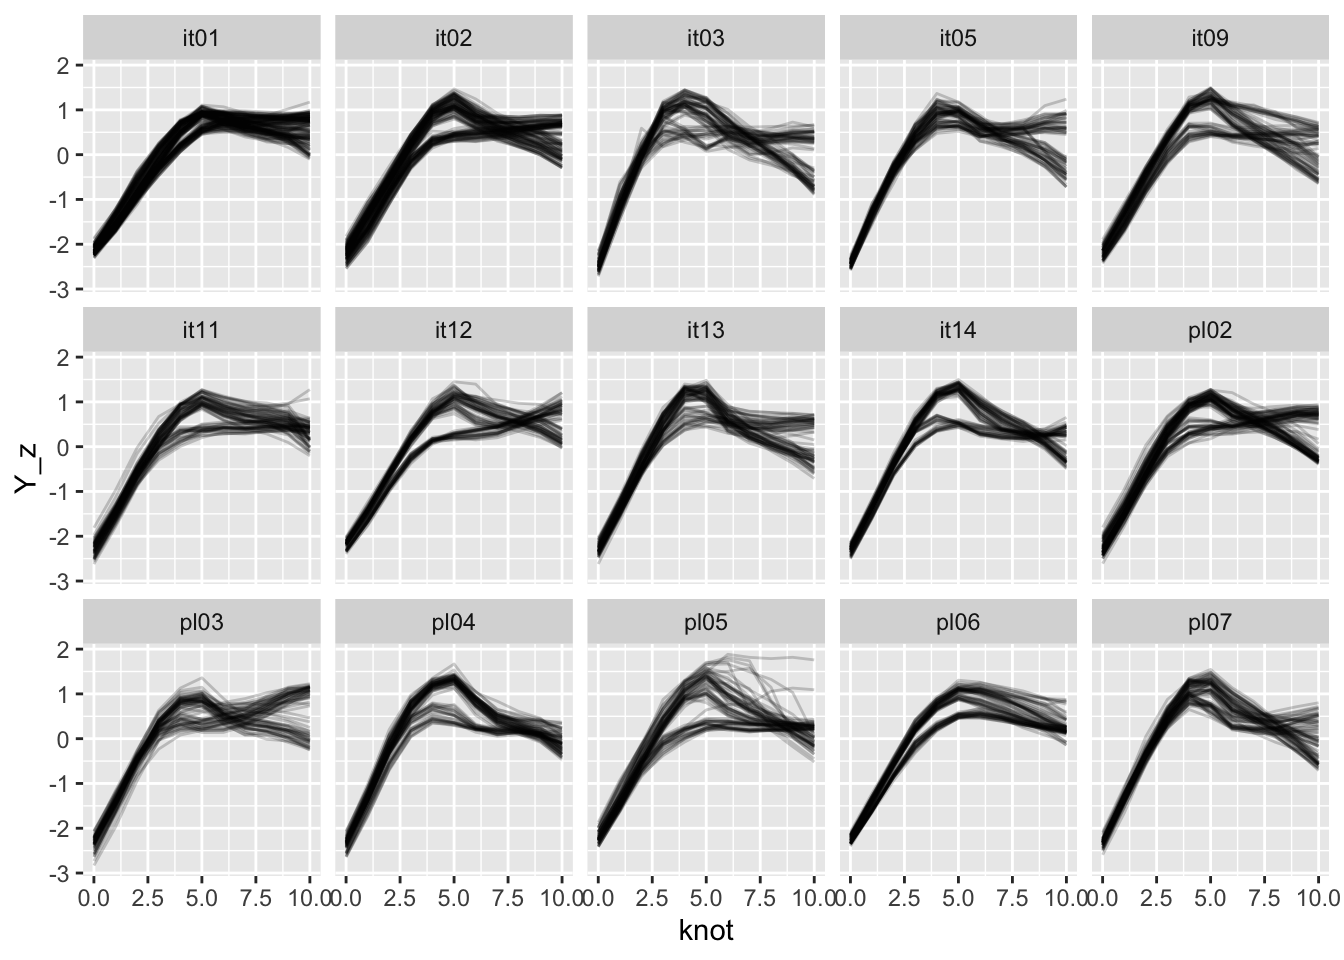

In [ ]:
dlc_voff_f |>
  filter(spline == "DLC_Tongue") |> 
  ggplot(aes(knot, Y_z, group = frame_id)) +
  geom_path(alpha = 0.2) +
  facet_wrap(vars(speaker), ncol = 5)


In [ ]:

saveRDS(dlc_voff_f, "data/coretta2018/dlc_voff_f.rds")


## Sakr 2025

Data from Sakr 2025 is in `data/sakr2025`.

In [ ]:

dlc_emph <- readRDS("data/sakr2025/dlc_emph.rds") |>
  mutate(
    participant = as.factor(participant),
    vow_emph = interaction(vowel, emph)
  )
table(dlc_emph$knot)



  0   1   2   3   4   5   6   7   8   9  10 
497 575 799 892 892 892 892 892 892 892 892 

In [ ]:
p <- dlc_emph |> 
  ggplot(aes(X, Y, group = frame_id, colour = emph, text = frame_id)) +
  geom_path(alpha = 0.5) +
  coord_fixed() +
  facet_grid(rows = vars(participant), cols = vars(vowel))

ggplotly(p, tooltip = "text")


Let’s filter tracking errors.

In [ ]:

dlc_emph_f <- dlc_emph |> 
  filter(
    !(frame_id %in% c(1309, 1557, 1073, 74, 1306, 1688, 1648, 1651, 233, 195, 192, 215, 357, 223))
  ) |> 
  mutate(
    vow_emph = interaction(vow_emph),
    participant = as.factor(participant)
  ) |> 
  group_by(participant) |> 
  mutate(
    X_z = (X - mean(X)) / sd(X),
    Y_z = (Y - mean(Y)) / sd(Y),
  ) |> 
  ungroup()


In [ ]:
p <- dlc_emph_f |> 
  ggplot(aes(X, Y, group = frame_id, colour = emph, text = frame_id)) +
  geom_path(alpha = 0.5) +
  coord_fixed() +
  facet_grid(rows = vars(participant), cols = vars(vowel))

ggplotly(p, tooltip = "text")


Finally save filtered data.

In [ ]:

saveRDS(dlc_emph_f, "data/sakr2025/dlc_emph_f.rds")
